Job Status: job has successfully run


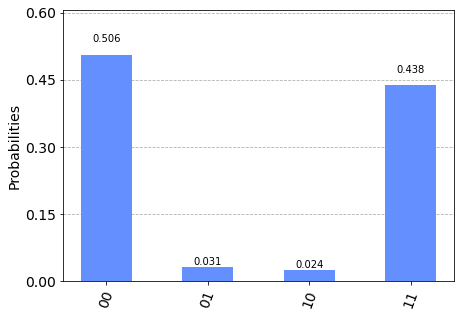

In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
from qiskit import IBMQ
from qiskit.tools.monitor import job_monitor

%matplotlib inline

# generate entanglement q0,sub0 to q0 sub1

token = "YOUR TOKEN"

IBMQ.save_account(token,overwrite=True)

qr = QuantumRegister(2) # Quantum bits
cr = ClassicalRegister(2) # Normal computer bits

circuit = QuantumCircuit(qr,cr) # make a circuit

circuit.h(qr[0]) # Create a Hadamard gate

circuit.cx(qr[0],qr[1]) # (start,target)

circuit.measure(qr,cr)

simulator = Aer.get_backend('qasm_simulator') # quantum assembly simmulator
result = execute(circuit, backend = simulator).result() # get reults of circuit

plot_histogram(result.get_counts(circuit)) # Getting all the results visually


IBMQ.load_account()

provider = IBMQ.get_provider('ibm-q')

# choose backend from the website dashboard >>
computer = provider.get_backend('ibmq_ourense')

job = execute(circuit, backend=computer)# execute

job_monitor(job) # monitor

result = job.result()
plot_histogram(result.get_counts(circuit))